Prepreparation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from Aho_Corasick import *

def stress_test(hertz: int, sigma: list[int] = 10) -> list[set[int]]:
    # Time List
    times = []

    # define base params
    word_len  = 10
    frequency = 10
    body_len  = 1000

    for _ in range(hertz):
        # Get Randomized Tests
        words = getRandomGenomes(word_len, frequency)
        body  = getRandomBody(body_len)

        start = time()
        # Time Base KMP with multiple words
        for i in range(frequency):
            BaseKMP = AhoCorasick([words[i]])
            BaseKMP.search_in_sequence(body)
        delta1 = time() - start

        start = time()
        # Time Aho Corasick Implementation of KMP
        Aho = AhoCorasick(words)
        Aho.search_in_sequence(body)
        delta2 = time() - start

        # Record Times
        times.append([delta1 * 1000, delta2 * 1000])

        # increment base params
        word_len  = word_len  * sigma[0]
        frequency = frequency * sigma[1]
        body_len  = body_len  * sigma[2]
    
    return times

Doubling Frequency

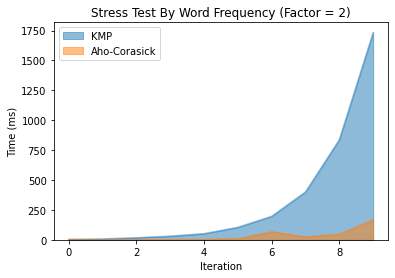

In [2]:
results = stress_test(10, [1, 2, 1])
df = pd.DataFrame(results, columns=['KMP', 'Aho-Corasick'])
df.plot(kind = 'area', stacked = False)
plt.xlabel('Iteration')
plt.ylabel('Time (ms)')
plt.title('Stress Test By Word Frequency (Factor = 2)')
plt.show()

Doubling Text Length

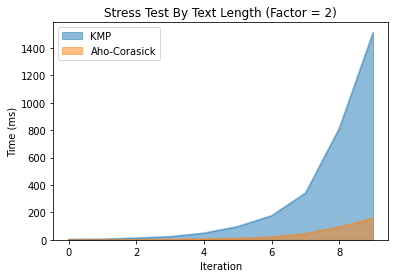

In [3]:
results = stress_test(10, [1, 1, 2])
df = pd.DataFrame(results, columns=['KMP', 'Aho-Corasick'])
df.plot(kind = 'area', stacked = False)
plt.xlabel('Iteration')
plt.ylabel('Time (ms)')
plt.title('Stress Test By Text Length (Factor = 2)')
plt.show()

Doubling Word and Text Length

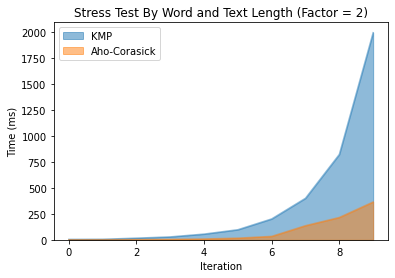

In [4]:
results = stress_test(10, [2, 1, 2])
df = pd.DataFrame(results, columns=['KMP', 'Aho-Corasick'])
df.plot(kind = 'area', stacked = False)
plt.xlabel('Iteration')
plt.ylabel('Time (ms)')
plt.title('Stress Test By Word and Text Length (Factor = 2)')
plt.show()

General Diagnosis Model

In [5]:
mcd = pd.DataFrame([{
    "Cystic Fibrosis"      : "".join("ACGT"[randint(0, 3)] for _ in range(10)),
    "Alpha-Thalassemia"    : "".join("ACGT"[randint(0, 3)] for _ in range(10)),
    "Beta-Thalassemia"     : "".join("ACGT"[randint(0, 3)] for _ in range(10)),
    "Sickle Cell Anemia"   : "".join("ACGT"[randint(0, 3)] for _ in range(10)),
    "Marfan Syndrome"      : "".join("ACGT"[randint(0, 3)] for _ in range(10)),
    "Fragile X Syndrome"   : "".join("ACGT"[randint(0, 3)] for _ in range(10)),
    "Huntington's Disease" : "".join("ACGT"[randint(0, 3)] for _ in range(10)),
    "Hematochromatis"      : "".join("ACGT"[randint(0, 3)] for _ in range(10)),
}]).T
mcd.columns = ["Sequence"]
print(mcd)

                        Sequence
Cystic Fibrosis       CTCCCACTTA
Alpha-Thalassemia     TCTTAAGCTC
Beta-Thalassemia      ATCCGTGCAG
Sickle Cell Anemia    GCCCGGTAGG
Marfan Syndrome       AACAGCGCAG
Fragile X Syndrome    CGCAGTAATC
Huntington's Disease  TAAGTGTGAT
Hematochromatis       TAACCTCGTT


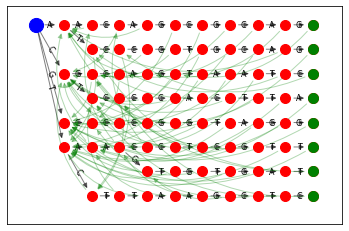

In [6]:
gdm = AhoCorasick(list(mcd['Sequence']))
gdm.visualize()

In [7]:
print(gdm.search_in_sequence("".join("ACGT"[randint(0, 3)] for _ in range(1000000))))


{'GCCCGGTAGG': [2478, 50638, 622554], 'CTCCCACTTA': [234556], 'TAAGTGTGAT': [288560, 452253], 'TAACCTCGTT': [341045, 715220], 'ATCCGTGCAG': [430630, 750690, 786647], 'CGCAGTAATC': [729173, 807540], 'AACAGCGCAG': [820763]}


Visualization for Paper

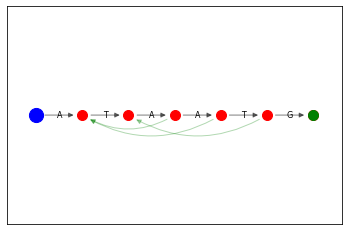

In [8]:
KMP_test = AhoCorasick(['ATAATG'])
KMP_test.visualize()

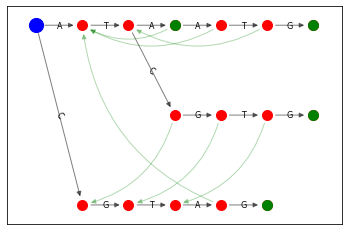

In [9]:
AC_test = AhoCorasick(['ATAATG', 'ATCGTG', 'CGTAG', 'ATA'])
AC_test.visualize()